# 1. Import Packages

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_types = ['melanoma', 'nevus', 'squamous cell carcinoma', 'benign']
label = {class_name:i for i, class_name in enumerate(class_types)}
image_size = (224, 224)

In [76]:
# # To delete some folder
import os
import shutil
# # shutil.rmtree(r'/content/test')
# for file in os.listdir('/content/test'):
#   if file.endswith('.jpg'):
#     os.remove(os.path.join(folder_path, images))
folder_path = ('/content/test')

test = os.listdir(folder_path)
for images in test:
    if images.endswith("//ipynb_checkpoints"):
        os.remove(os.path.join(folder_path, images))

# 2. Read the 2 Dataset Folder(train, test) that contain the 4 folder for each type of skin cancer

In [ ]:
def read_dataset():    
    path_ = ['/content/train', '/content/test']
    results = [] 
    for data in path_:
        img = []
        labels = []
        print("Loading {}".format(data))
        for folder in os.listdir(data):
            category = label[folder]
            for file in tqdm(os.listdir(os.path.join(data, folder))):
                
                img_path = os.path.join(os.path.join(data, folder), file)
                
                i = cv2.imread(img_path)
                i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
                i = cv2.resize(i, image_size) 
                               
                img.append(i)
                labels.append(category)
        img = np.array(img, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        results.append((img, labels))
    return results

In [71]:
# To delete ipynb_checkpoints From folders
#rmdir /content/test/.ipynb_checkpoints
# rmdir /content/train/.ipynb_checkpoints

NameError: ignored

In [78]:
rmdir /content/test/.ipynb_checkpoints 

In [79]:
(train_img, train_labels), (test_img, test_labels) = read_dataset()

Loading /content/train


0it [00:00, ?it/s]
100%|██████████| 181/181 [00:02<00:00, 85.41it/s]


Loading /content/test


100%|██████████| 165/165 [00:01<00:00, 92.27it/s]


In [80]:
train_img, train_labels = shuffle(train_img, train_labels, random_state=25)

In [81]:
number_train = train_labels.shape[0]
number_test_img = test_labels.shape[0]
print ("Number of train  Images for 4 classess of skin Cancer: {}".format(number_train))
print ("Number of test Images for 4 classess of skin Cancer: : {}".format(number_test_img))
print ("Shape of Image The (l,w): {}".format(image_size))

Number of train  Images for 4 classess of skin Cancer: 1081
Number of test Images for 4 classess of skin Cancer: : 1045
Shape of Image The (l,w): (224, 224)


In [82]:
# Normalization The size of Images On Dataset
train_img = train_img / 255.0 
test_img = test_img / 255.0

# 3. data visualization images dataset  

**Show Same Sample from the Dataset**

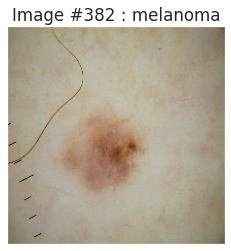

In [83]:
def display_image(class_names, images, labels):    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
display_image(class_types , train_img, train_labels)

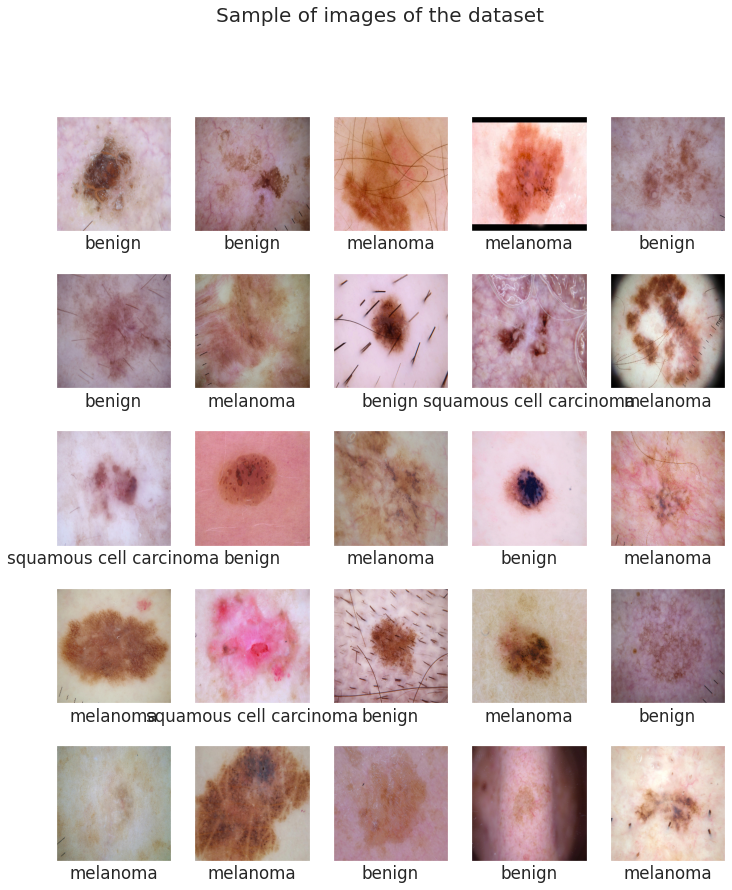

In [108]:
def display_group_Images(class_types, images, labels):
    fig = plt.figure(figsize=(12,14))
    fig.suptitle("Sample of images of the dataset", fontsize=20)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_types [labels[i]])
    plt.show()
display_group_Images(class_types , train_img, train_labels)

#4. Use Deep Learning Model : that called Convolutional Neural Network  CNN 

Use CNN to train on Image dataset and obtion The results 

In [89]:
"  Identify the layaers On CNN model"
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [90]:
" Train The Model  epochs is 20"
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
history = model.fit(train_img, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
7/7 [==============================] - 52s 7s/step - loss: 4.3033 - accuracy: 0.3993 - val_loss: 1.4185 - val_accuracy: 0.4562
Epoch 2/20
7/7 [==============================] - 49s 7s/step - loss: 1.2021 - accuracy: 0.4340 - val_loss: 1.0014 - val_accuracy: 0.6037
Epoch 3/20
7/7 [==============================] - 55s 8s/step - loss: 1.0363 - accuracy: 0.4572 - val_loss: 0.9559 - val_accuracy: 0.5161
Epoch 4/20
7/7 [==============================] - 49s 7s/step - loss: 0.9640 - accuracy: 0.5417 - val_loss: 0.9596 - val_accuracy: 0.5484
Epoch 5/20
7/7 [==============================] - 50s 7s/step - loss: 0.9228 - accuracy: 0.6169 - val_loss: 1.1340 - val_accuracy: 0.5161
Epoch 6/20
7/7 [==============================] - 49s 7s/step - loss: 0.9399 - accuracy: 0.5764 - val_loss: 0.7195 - val_accuracy: 0.7097
Epoch 7/20
7/7 [==============================] - 49s 7s/step - loss: 0.6944 - accuracy: 0.7014 - val_loss: 0.6878 - val_accuracy: 0.7327
Epoch 8/20
7/7 [==================

# 5. Get the Result Of model 

33/33 [==============================] - 15s 453ms/step - loss: 6.4939 - accuracy: 0.7254


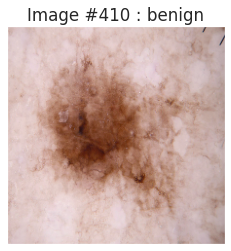

In [92]:
test_loss = model.evaluate(test_img, test_labels)
predictions = model.predict(test_img)     
pred_labels = np.argmax(predictions, axis = 1) 
display_image(class_types, test_img, pred_labels)

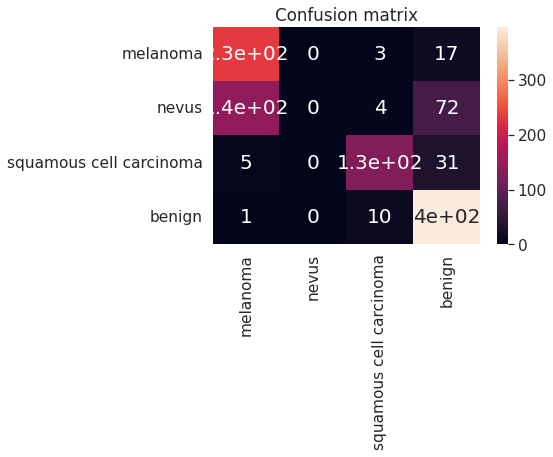

In [98]:
Confusion_matrix = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(Confusion_matrix, annot=True, 
           annot_kws={"size": 20}, 
           xticklabels=class_types , 
           yticklabels=class_types , ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# 6. Save the Model To use it In Andriod Studios 

In [94]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcucx6kow/assets


INFO:tensorflow:Assets written to: /tmp/tmpcucx6kow/assets


In [95]:
model.save_weights("model.h5")

In [109]:
model.save('model.h5')